Building prefix dict from C:\Users\K410\文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.u63ebedfde141b6c38dd943b00325bb79.cache


標題：排球少年！！ - 在線看漫畫https://tw.manhuagui.com › comic
網址：/url?q=https://tw.manhuagui.com/comic/4723/&sa=U&ved=2ahUKEwiIxMOmt8PlAhWRw4sBHUw3AhYQFjAAegQIChAB&usg=AOvVaw2YiLjbzb58DjSE6TIrpipd
標題：
網址：/url?q=https://tw.shop.com/-1501094042-p%2B.xhtml%3Ftkr%3D180226130423&sa=U&ved=2ahUKEwiIxMOmt8PlAhWRw4sBHUw3AhYQwW4wAXoECAsQAg&usg=AOvVaw07h-JFI5Nh-isgbuQR_ido
標題：排球少年！！ - 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 排球少年！！
網址：/url?q=https://zh.wikipedia.org/zh-tw/%25E6%258E%2592%25E7%2590%2583%25E5%25B0%2591%25E5%25B9%25B4%25EF%25BC%2581%25EF%25BC%2581&sa=U&ved=2ahUKEwiIxMOmt8PlAhWRw4sBHUw3AhYQFjAPegQIBxAB&usg=AOvVaw3ZCjJd-wwTLZB8XvIn54rA
標題：排球- 維基百科，自由的百科全書 - Wikipediahttps://zh.wikipedia.org › zh-tw › 排球
網址：/url?q=https://zh.wikipedia.org/zh-tw/%25E6%258E%2592%25E7%2590%2583&sa=U&ved=2ahUKEwiIxMOmt8PlAhWRw4sBHUw3AhYQFjAQegQICBAB&usg=AOvVaw02ThvI23NMTTg77GvovRp7
標題：排球排球370 排球少年古館春一線上漫畫（99770漫畫）99770.hhxxee.com › comic
網址：/url?q=http://99770.hhxxee.com/comic/9858/&sa=U&ved=2ahUKEwiIxMOmt8PlAhW

Loading model cost 1.093 seconds.
Prefix dict has been built succesfully.


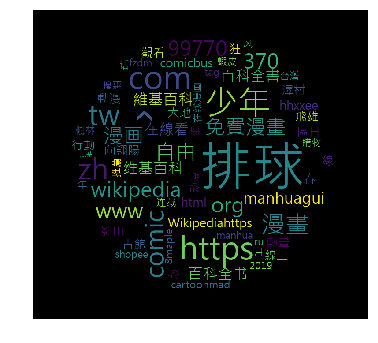

In [3]:
# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search?q=%E6%8E%92%E7%90%83&oq=%E6%8E%92%E7%90%83&aqs=chrome..69i57j0l5.2294j0j7&sourceid=chrome&ie=UTF-8'

# 查詢參數
my_params = {'q': '排球'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))
#-----------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\msjh.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("circle.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="black",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔